In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-lok-sabha-election-results-2024/election_results_2024.csv


In [2]:
df = pd.read_csv('/kaggle/input/india-lok-sabha-election-results-2024/election_results_2024.csv')
df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [4]:
df.loc[df['Leading Party'] == 'Bharatiya Janata Party']#.sort_values('Margin', ascending = False)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
...,...,...,...,...,...,...,...,...
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,Result Declared
529,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,Result Declared
532,Valsad,26,DHAVAL LAXMANBHAI PATEL,Bharatiya Janata Party,ANANTKUMAR HASMUKHBHAI PATEL,Indian National Congress,210704,Result Declared
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,Result Declared


In [5]:
df['Margin'] = df['Margin'].replace('-', np.nan).astype('float')
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared


In [6]:
df.sort_values('Margin', ascending = False)
top5_candidates = df.sort_values('Margin', ascending = False).head()
bottom5_candidates = df.sort_values('Margin', ascending = False).tail()
top5_candidates

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092.0,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476.0,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408.0,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551.0,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716.0,Result Declared


In [7]:
bottom5_candidates

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
226,JAIPUR RURAL,6,RAO RAJENDRA SINGH,Bharatiya Janata Party,ANIL CHOPRA,Indian National Congress,1615.0,Result Declared
236,Jajpur,8,RABINDRA NARAYAN BEHERA,Bharatiya Janata Party,SARMISTHA SETHI,Biju Janata Dal,1587.0,Result Declared
40,Attingal,19,ADV ADOOR PRAKASH,Indian National Congress,V JOY,Communist Party of India (Marxist),684.0,Result Declared
357,Mumbai North West,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48.0,Result Declared
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,NaN,Uncontested


In [8]:
a = df.groupby('Leading Party')[['Margin']].sum().sort_values('Margin', ascending = False).sum().iloc[0]
top_10_parties_by_vote_margin = df.groupby('Leading Party')[['Margin']].sum().head(10).sort_values('Margin', ascending = False)
top_10_parties_by_vote_margin['Vote_Margin_Share'] = (top_10_parties_by_vote_margin['Margin'] / a)*100
top_10_parties_by_vote_margin

,Margin,Vote_Margin_Share
Leading Party,,
Bharatiya Janata Party,46081536.0,52.369104
All India Trinamool Congress,4910963.0,5.581036
All India Majlis-E-Ittehadul Muslimeen,338087.0,0.384217
Communist Party of India,334885.0,0.380578
Bharat Adivasi Party,247054.0,0.280763
Aam Aadmi Party,227517.0,0.258560
Asom Gana Parishad,222351.0,0.252690
Aazad Samaj Party (Kanshi Ram),151473.0,0.172141
AJSU Party,80880.0,0.091916


In [9]:
total_parties_who_won_seats = df.groupby('Leading Party')[['Margin']].sum().sort_values('Margin', ascending = False).count().iloc[0]
total_parties_who_won_seats

42

,Margin
Leading Party,
Bharatiya Janata Party,46081536.0
All India Trinamool Congress,4910963.0
All India Majlis-E-Ittehadul Muslimeen,338087.0
Communist Party of India,334885.0
Bharat Adivasi Party,247054.0
Aam Aadmi Party,227517.0
Asom Gana Parishad,222351.0
Aazad Samaj Party (Kanshi Ram),151473.0
AJSU Party,80880.0


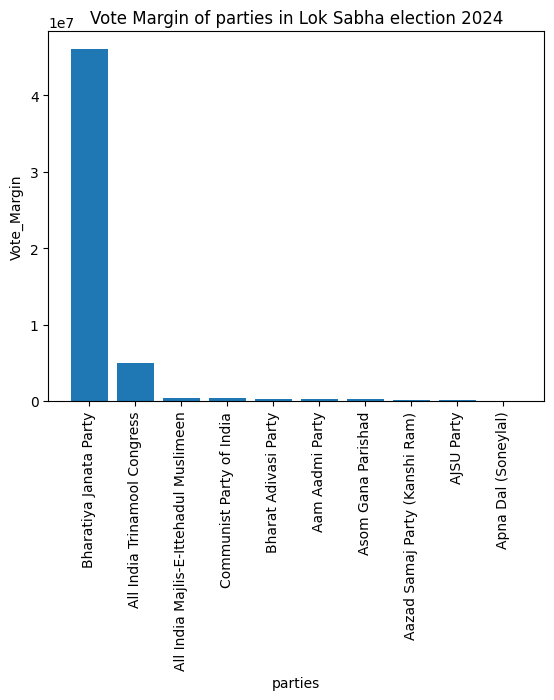

In [10]:
top_10_parties_by_margin = df.groupby('Leading Party')[['Margin']].sum().head(10).sort_values('Margin', ascending = False)

fig, ax = plt.subplots()
ax.bar(top_10_parties_by_margin.index, top_10_parties_by_margin.Margin)
ax.set_xlabel('parties')
ax.set_ylabel('Vote_Margin')
ax.set_title('Vote Margin of parties in Lok Sabha election 2024')
plt.xticks(rotation = 90);
top_10_parties_by_margin

Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

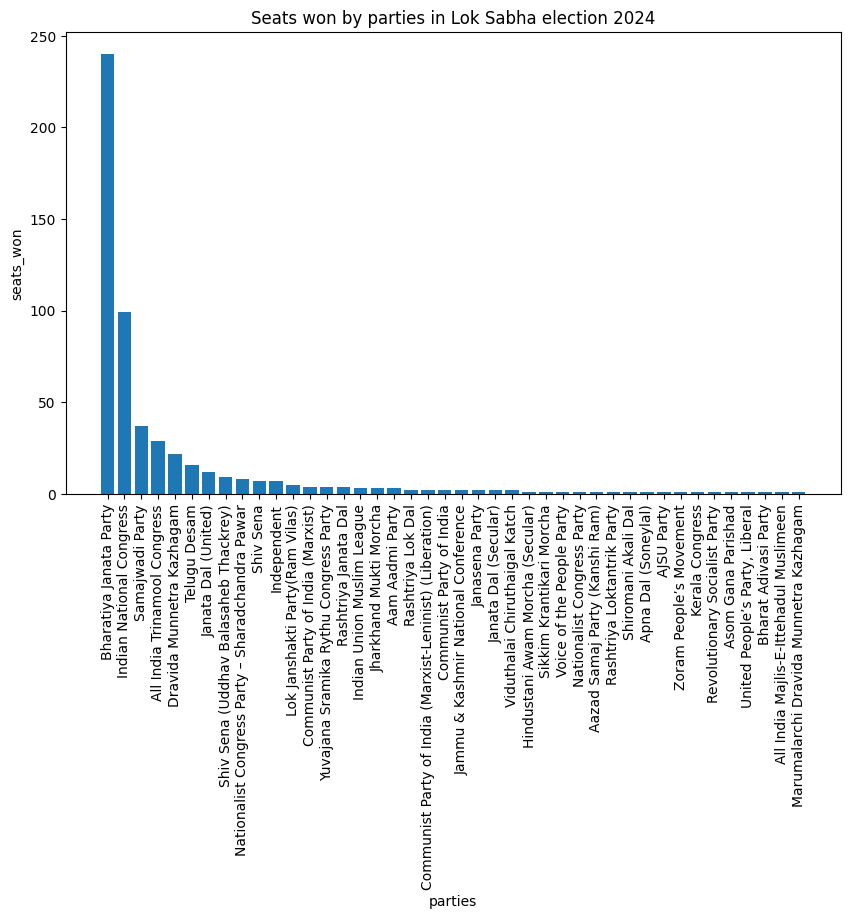

In [11]:
seats_won_by_parties = df['Leading Party'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(seats_won_by_parties.index, seats_won_by_parties.values)
ax.set_xlabel('parties')
ax.set_ylabel('seats_won')
ax.set_title('Seats won by parties in Lok Sabha election 2024')
plt.xticks(rotation = 90);
seats_won_by_parties

In [12]:
Other_parties_seats_except_BJP = df['Leading Party'].value_counts().sum() - df['Leading Party'].value_counts().iloc[0]
Other_parties_seats_except_BJP

303

,Candidate,Constituency,vote_margin
0,Rahul Gandhi,Rae Bareli,390030.0
1,Rahul Gandhi,Wayanad,364422.0
2,Narendra Modi,Varanasi,152513.0
3,Amit Shah,Gandhinagar,744716.0


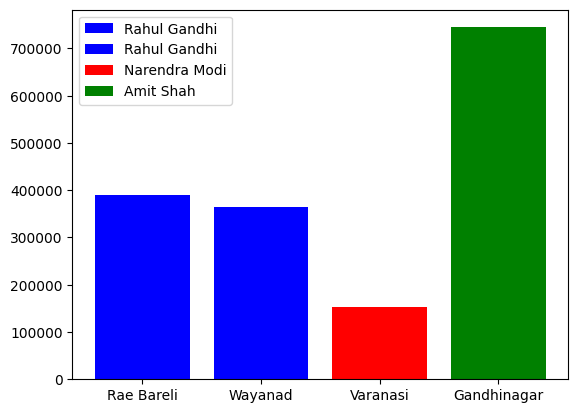

In [13]:
rahul = df.loc[df['Leading Candidate'] == 'RAHUL GANDHI']
narendra = df.loc[df['Leading Candidate'] == 'NARENDRA MODI']
amit = df.loc[df['Leading Candidate'] == 'AMIT SHAH']

rahul_votes = rahul['Margin'].values
narendra_votes = narendra['Margin'].values[0]
amit_votes = amit['Margin'].values[0]


data_to_plot = pd.DataFrame({
    'Candidate' : ['Rahul Gandhi', 'Rahul Gandhi', 'Narendra Modi', 'Amit Shah'],
    'Constituency' : list(rahul['Constituency']) + [narendra['Constituency'].values[0], amit['Constituency'].values[0]],
    'vote_margin' : list(rahul_votes) + [narendra_votes, amit_votes]
})


fig, ax = plt.subplots()
ax.bar(data_to_plot.Constituency, data_to_plot.vote_margin, label = data_to_plot.Candidate, color = ['blue', 'blue', 'red', 'green'])
ax.legend()
data_to_plot

Trailing Party
Indian National Congress                    35872203.0
Bharatiya Janata Party                      18160854.0
All India Anna Dravida Munnetra Kazhagam     5519091.0
Yuvajana Sramika Rythu Congress Party        4926068.0
Communist Party of India (Marxist)           2622123.0
Samajwadi Party                              2365143.0
Biju Janata Dal                              2236289.0
Rashtriya Janata Dal                         1962693.0
Bahujan Samaj Party                          1716321.0
Aam Aadmi Party                              1277670.0
Name: Margin, dtype: float64

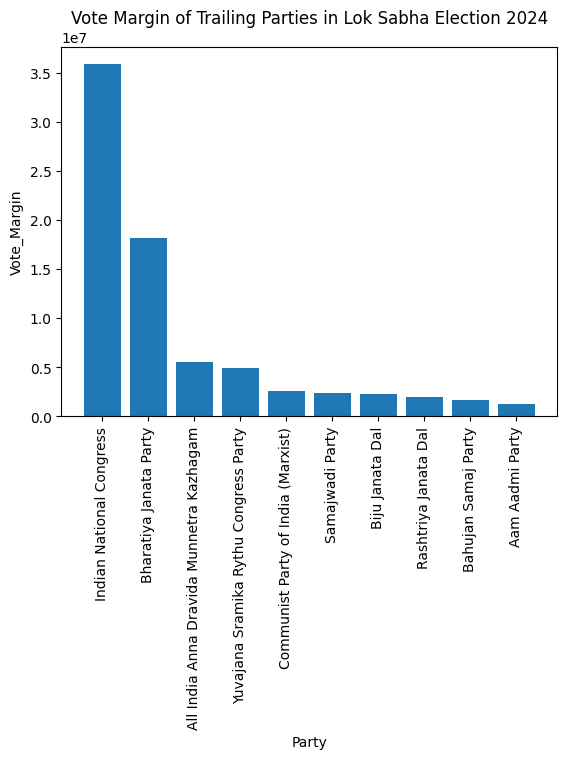

In [14]:
top_10_trailing_party = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending = False).head(10)


fig, ax = plt.subplots()
ax.bar(top_10_trailing_party.index, top_10_trailing_party.values)
ax.set_xlabel('Party')
ax.set_ylabel('Vote_Margin')
ax.set_title('Vote Margin of Trailing Parties in Lok Sabha Election 2024')
plt.xticks(rotation = 90);
top_10_trailing_party

Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Part

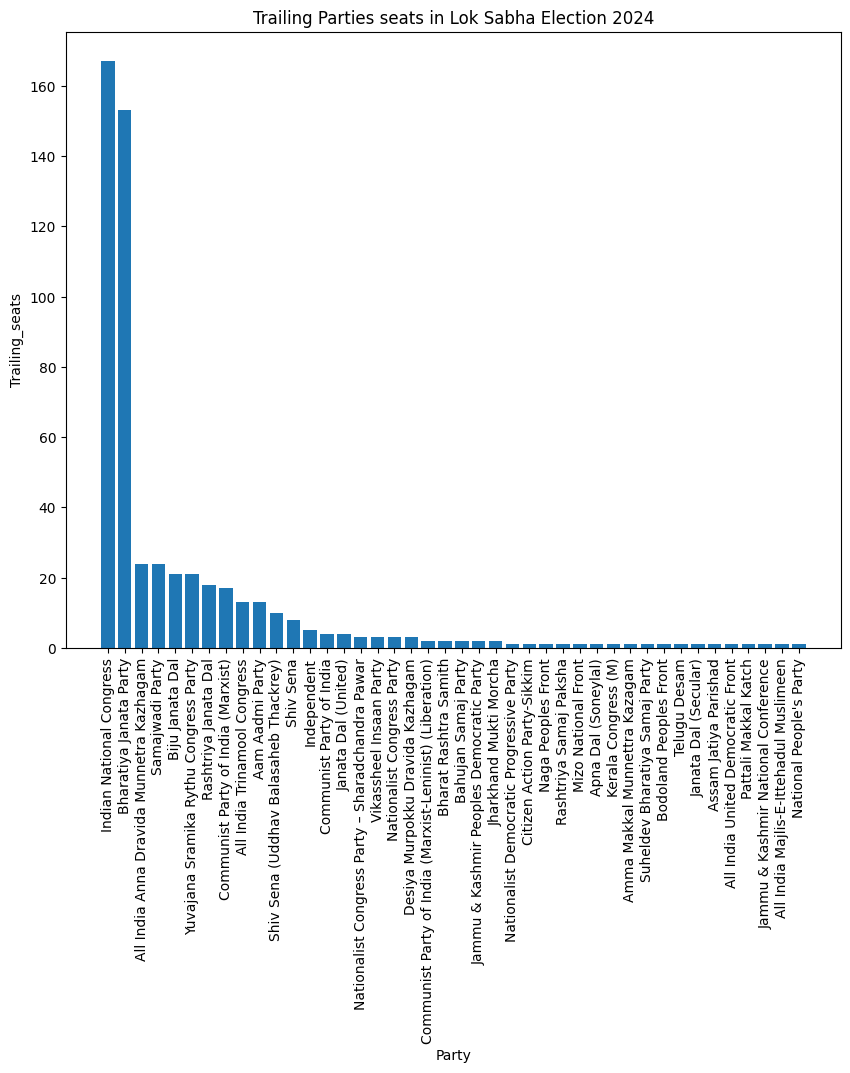

In [15]:
trailing_party_seats = df['Trailing Party'].value_counts()


fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(trailing_party_seats.index, trailing_party_seats.values)
ax.set_xlabel('Party')
ax.set_ylabel('Trailing_seats')
ax.set_title('Trailing Parties seats in Lok Sabha Election 2024')
plt.xticks(rotation = 90);

trailing_party_seats

In [16]:
BJP_narrowly_missed_seats = df.loc[(df['Margin'] < 10000) & (df['Trailing Party'] == 'Bharatiya Janata Party')]
print(BJP_narrowly_missed_seats.count().iloc[0])
BJP_narrowly_missed_seats

8


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
33,Arambagh,29,BAG MITALI,All India Trinamool Congress,ARUP KANTI DIGAR,Bharatiya Janata Party,6399.0,Result Declared
89,Beed,39,BAJRANG MANOHAR SONWANE,Nationalist Congress Party – Sharadchandra Pawar,PANKAJA GOPINATHRAO MUNDE,Bharatiya Janata Party,6553.0,Result Declared
125,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504.0,Result Declared
147,Daman & Diu,1,PATEL UMESHBHAI BABUBHAI,Independent,LALUBHAI BABUBHAI PATEL,Bharatiya Janata Party,6225.0,Result Declared
155,Dhaurahra,29,ANAND BHADAURIYA,Samajwadi Party,REKHA VERMA,Bharatiya Janata Party,4449.0,Result Declared
158,Dhule,2,BACHHAV SHOBHA DINESH,Indian National Congress,BHAMRE SUBHASH RAMRAO,Bharatiya Janata Party,3831.0,Result Declared
207,Hamirpur,47,AJENDRA SINGH LODHI,Samajwadi Party,KUNWAR PUSHPENDRA SINGH CHANDEL,Bharatiya Janata Party,2629.0,Result Declared
460,Salempur,71,RAMASHANKAR RAJBHAR,Samajwadi Party,RAVINDAR KUSHAWAHA,Bharatiya Janata Party,3573.0,Result Declared


In [17]:
INC_narrowly_missed_seats = df.loc[(df['Margin'] < 10000) & (df['Trailing Party'] == 'Indian National Congress')]
print(INC_narrowly_missed_seats.count().iloc[0])
INC_narrowly_missed_seats

4


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
74,Bansgaon,67,KAMLESH PASWAN,Bharatiya Janata Party,SADAL PRASAD,Indian National Congress,3150.0,Result Declared
226,JAIPUR RURAL,6,RAO RAJENDRA SINGH,Bharatiya Janata Party,ANIL CHOPRA,Indian National Congress,1615.0,Result Declared
256,KANKER,11,BHOJRAJ NAG,Bharatiya Janata Party,BIRESH THAKUR,Indian National Congress,1884.0,Result Declared
334,Mahbubnagar,11,ARUNA. D. K,Bharatiya Janata Party,CHALLA VAMSHI CHAND REDDY,Indian National Congress,4500.0,Result Declared
